# Sales Funnel Analysis

In [1]:
import pandas as pd
dataset= pd.read_csv("svs-dataset.csv", encoding = "ISO-8859-1")

### Cleaning 

Before analyzing the dataset I had to clean the dataset. I started by dropping rows with missing values since they would mess up the analysis later. I also removed logical inconsistencies by removing rows where the number of purchases was greater than the number of checkout adds since you have to add items to a cart before you can make a purchase. After cleaning the data there were 81106 rows. 

In [2]:
dataset_clean = dataset.dropna()

In [3]:

index_rows = dataset_clean[dataset_clean['purchases'] > dataset_clean['checkout_adds']].index


dataset_clean.drop(index_rows, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [4]:
dataset_clean.reset_index(drop=True)

,id,first_name,last_name,date_joined,gender,age,address,state,credit_card,site_visits,product_page_visits,checkout_adds,purchases,utm_source,aov,cac,nps,device,mins_spent_on_site
0,1,Shanon,Freezer,11/27/2018,female,35-44,5952 Bunting Plaza,Texas,visa,44,14,14,4,facebook_ad,40,92,7.0,mobile,13
1,2,Jourdain,Sibborn,3/10/2019,female,25-34,38 Scott Street,Texas,visa,27,18,4,2,facebook_ad,38,66,7.0,web,11
2,3,Marni,Allin,6/15/2018,female,45-54,7279 Kenwood Drive,California,visa,47,2,2,0,referral,37,10,6.0,mobile,4
3,4,Bibby,Tuffell,4/25/2018,female,25-34,1275 Mifflin Way,Florida,american express,48,8,2,2,facebook_ad,17,65,10.0,mobile,1
4,5,Jean,Hearty,5/4/2018,female,35-44,10 Reindahl Court,California,visa,39,17,1,1,affiliate,51,103,7.0,mobile,8
5,7,Mendie,Glasgow,7/10/2018,female,65+,9 Summit Place,California,visa,54,13,2,0,google_ad,52,77,5.0,mobile,6
6,8,Dehlia,Rolls,10/6/2018,female,18-24,0 Division Court,Tennessee,visa,44,13,6,4,referral,38,36,9.0,mobile,8
7,9,Elonore,Sapsed,6/4/2018,female,25-34,38 Anderson Lane,Florida,american express,5,5,4,1,organic,39,0,1.0,mobile,4
8,10,Sarajane,Entwhistle,11/27/2018,male,65+,7 Ohio Plaza,Illinois,visa,43,5,4,4,facebook_ad,33,58,7.0,web,9
9,11,Leshia,Gabbitas,8/4/2018,female,45-54,68 Steensland Point,California,visa,85,21,6,3,google_ad,65,44,7.0,mobile,4


### Funnels

There are five steps in the site funnel. Site visits, product page visits, checkout adds, purchases, and repurchases. The four funnels are the percentage of site visits that become product page visits,the amount of product page visits that result in a checkout cart addition, the percentage of additions to the checkout cart that become purchases, and the percentage of customers who repurchase. 

To find these conversions I had to create a couple functions, additional data frames, and new columns. First I created a function that counted the number of people who made multiple purchases. The function takes two paramters, the demographic such as age or gender and the value of that demographic like "18-24" or "male" and returns a count of how many people have more than one purchase, the second function counts the total customers by using the same process as the first function but counting purchases over 0. 

Next I created a new column called month because later I will be grouping rows by the month they happened in. In order to do that I had to take a slice of the date_joined value in each row from 0:2 which would take the first two values and store it as the month. 

I then created 12 new data frames that group by the 6 categories age, gender, state, device, source, and month and then for each group find the sum of each row and the count for each row these data frames will be useful for later analysis.  

I then created a function called columns_for_conversions that generates the additional columns necessary to find the conversion metrics as well as a column called demographics that stores the value of the grouping we are looking at. I did this so when I create one dataframe with all the demographics in it they would stack on each other nicely since they'd all have the same columns. I then passed each grouping through the function to add the columns.

In [5]:
def count_multiple_purchase(demographic, value): # for example if the demographic was age your value would be "18-24"
            
    demographic_true = dataset_clean [demographic] == value
    purchases_true = dataset_clean ["purchases"] > 1
            
    condition = dataset_clean[purchases_true & demographic_true] 
    count = condition.count()
    return count[3]

def count_total_customers(demographic,value):
    
    demographic_true = dataset_clean [demographic] == value
    purchases_true = dataset_clean ["purchases"] > 0
    
    condition = dataset_clean[purchases_true & demographic_true] 
    count = condition.count()
    return count[3]



In [6]:
dataset_clean['month'] = dataset_clean.date_joined.str[:2]
dataset_clean['month'] = dataset_clean['month'].str.replace('/','')

dataset_clean["profit"]= (dataset_clean["aov"]* dataset_clean["purchases"]) - dataset_clean["cac"]

dataset_clean

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,id,first_name,last_name,date_joined,gender,age,address,state,credit_card,site_visits,...,checkout_adds,purchases,utm_source,aov,cac,nps,device,mins_spent_on_site,month,profit
0,1,Shanon,Freezer,11/27/2018,female,35-44,5952 Bunting Plaza,Texas,visa,44,...,14,4,facebook_ad,40,92,7.0,mobile,13,11,68
1,2,Jourdain,Sibborn,3/10/2019,female,25-34,38 Scott Street,Texas,visa,27,...,4,2,facebook_ad,38,66,7.0,web,11,3,10
2,3,Marni,Allin,6/15/2018,female,45-54,7279 Kenwood Drive,California,visa,47,...,2,0,referral,37,10,6.0,mobile,4,6,-10
3,4,Bibby,Tuffell,4/25/2018,female,25-34,1275 Mifflin Way,Florida,american express,48,...,2,2,facebook_ad,17,65,10.0,mobile,1,4,-31
4,5,Jean,Hearty,5/4/2018,female,35-44,10 Reindahl Court,California,visa,39,...,1,1,affiliate,51,103,7.0,mobile,8,5,-52
6,7,Mendie,Glasgow,7/10/2018,female,65+,9 Summit Place,California,visa,54,...,2,0,google_ad,52,77,5.0,mobile,6,7,-77
7,8,Dehlia,Rolls,10/6/2018,female,18-24,0 Division Court,Tennessee,visa,44,...,6,4,referral,38,36,9.0,mobile,8,10,116
8,9,Elonore,Sapsed,6/4/2018,female,25-34,38 Anderson Lane,Florida,american express,5,...,4,1,organic,39,0,1.0,mobile,4,6,39
9,10,Sarajane,Entwhistle,11/27/2018,male,65+,7 Ohio Plaza,Illinois,visa,43,...,4,4,facebook_ad,33,58,7.0,web,9,11,74
10,11,Leshia,Gabbitas,8/4/2018,female,45-54,68 Steensland Point,California,visa,85,...,6,3,google_ad,65,44,7.0,mobile,4,8,151


In [7]:
age_grouping = dataset_clean.groupby('age').sum()
age_grouping_counts = dataset_clean.groupby('age').count()
gender_grouping = dataset_clean.groupby('gender').sum()
gender_grouping_counts = dataset_clean.groupby('gender').count()
state_grouping = dataset_clean.groupby('state').sum()
state_grouping_counts = dataset_clean.groupby('state').count()
device_grouping = dataset_clean.groupby('device').sum()
device_grouping_counts = dataset_clean.groupby('device').count()
source_grouping = dataset_clean.groupby('utm_source').sum()
source_grouping_counts = dataset_clean.groupby('utm_source').count()
month_grouping = dataset_clean.groupby('month').sum()
month_grouping_counts = dataset_clean.groupby('month').count()

In [8]:
age_grouping = age_grouping.reset_index()
age_grouping_counts = age_grouping_counts.reset_index()
gender_grouping = gender_grouping.reset_index()
gender_grouping_counts = gender_grouping_counts.reset_index()
state_grouping = state_grouping.reset_index()
state_grouping_counts = state_grouping_counts.reset_index()
device_grouping = device_grouping.reset_index()
device_grouping_counts = device_grouping_counts.reset_index()
source_grouping = source_grouping.reset_index()
source_grouping_counts = source_grouping_counts.reset_index()
month_grouping = month_grouping.reset_index()
month_grouping_counts = month_grouping_counts.reset_index()

In [9]:
def columns_for_conversions(grouping,demographic): # pass the argument grouping as age_grouping w/o quotes
    
    grouping["site_to_product"] = grouping["product_page_visits"]/grouping["site_visits"] *100
    grouping["product_to_adding"] = grouping["checkout_adds"]/grouping["product_page_visits"] *100
    grouping["adding_to_purchasing"] = grouping["purchases"]/grouping["checkout_adds"] *100

    for i in range(len(grouping)):
        value = grouping[demographic][i]
        grouping["total_customers"] =  count_total_customers(demographic,value)
        grouping["repurchasing_customers"]= count_multiple_purchase(demographic,value)
        grouping["repurchasing_rate"] = grouping["repurchasing_customers"]/grouping["total_customers"]*100
        grouping["demographic"]= value
    for i in range(len(grouping)):
        value = grouping[demographic][i]
        grouping["total_customers"][i] =  count_total_customers(demographic,value)
        grouping["repurchasing_customers"][i]= count_multiple_purchase(demographic,value)
        grouping["repurchasing_rate"][i] = grouping["repurchasing_customers"][i]/grouping["total_customers"][i]*100
        grouping["demographic"][i]= value
    
    return 

In [10]:
columns_for_conversions(age_grouping, "age")
columns_for_conversions(gender_grouping, "gender")
columns_for_conversions(state_grouping, "state")
columns_for_conversions(device_grouping, "device")
columns_for_conversions(source_grouping, "utm_source")
columns_for_conversions(month_grouping, "month")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A va

### New Data Frames 

I created new data frames that contain the column demographic and the four conversion measures for each of the groupings and then I concatonated those six data frames into one data frame with conversion percentages.

In [11]:
age_df = age_grouping[["demographic",'site_to_product','product_to_adding','adding_to_purchasing','repurchasing_rate',]]
gender_df = gender_grouping[["demographic",'site_to_product','product_to_adding','adding_to_purchasing','repurchasing_rate',]]
state_df = state_grouping[["demographic",'site_to_product','product_to_adding','adding_to_purchasing','repurchasing_rate',]]
device_df = device_grouping[["demographic",'site_to_product','product_to_adding','adding_to_purchasing','repurchasing_rate',]]
source_df = source_grouping[["demographic",'site_to_product','product_to_adding','adding_to_purchasing','repurchasing_rate',]]
month_df = month_grouping[["demographic",'site_to_product','product_to_adding','adding_to_purchasing','repurchasing_rate',]]

In [12]:
frames = [age_df, gender_df, state_df, device_df, source_df, month_df]

conversions_df = pd.concat(frames)

In [13]:
conversions_df

,demographic,site_to_product,product_to_adding,adding_to_purchasing,repurchasing_rate
0,18-24,23.711008,49.947970,42.433659,78.967202
1,25-34,23.766698,49.676060,42.565147,79.308680
2,35-44,23.806181,48.978159,42.952118,79.016854
3,45-54,23.724182,49.280550,43.027688,79.841674
4,55-64,23.577911,49.518892,42.869121,79.345016
5,65+,23.988803,48.689205,42.886149,78.968031
0,female,23.765842,49.352029,46.276574,83.574522
1,male,23.767494,49.560129,36.789538,71.957884
0,Alabama,24.609136,49.732296,36.958935,74.593128
1,Alaska,22.859410,51.183339,36.868064,80.099502


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Conversion Rates by Gender')

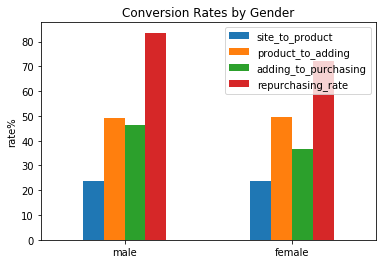

In [15]:
conversions = ["site_to_product","product_to_adding","adding_to_purchasing","repurchasing_rate"]
gender_df[conversions].plot.bar()
genders = ('male','female')
ypos_gender= range(len(genders))
plt.xticks(ypos_gender,genders, rotation = 'horizontal')
plt.ylabel("rate%")
plt.title("Conversion Rates by Gender")

Text(0.5,1,'Conversion Rates by Age')

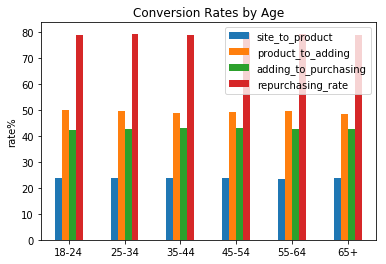

In [16]:
age_df[conversions].plot.bar()
ages = []
for i in range(len(age_df)):
    ages.append(age_df["demographic"][i])
ypos_age = range(len(ages))
plt.xticks(ypos_age,ages, rotation = 'horizontal')
plt.ylabel("rate%")
plt.title("Conversion Rates by Age")

### Conversion Trends

I plotted the conversion rates for the two gender demographics and the age demographics to look at any trends that exist. For both gender and age the conversion rates have little difference across the different demographics. It appears that males have a higher rate of purchasing and repurchasing than females. Also across all demographics the repurchasing rate is very high meaning that customers who order an item are apparently happy with their purchase and make more purchases.

### Profitability 

Assuming the companies only cost is that of acquiring a customer they had $3,339,195 in profits for the period in this data set. Looking at the number of customers where there total purchase amount was greater than the cost of acquiring them the business was profitable on just under 56% of its customers. They also have a net promoter score of roughly -0.25 meaning .25% more of their users are detractors as opposed to being promoters. This means that overall less of their customers are individuals who are loyal to the company and would help bring new customers on board. 

In [17]:
dataset_clean["profit"]= (dataset_clean["aov"]* dataset_clean["purchases"]) - dataset_clean["cac"]
profit = dataset_clean["profit"].sum()
profit

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


3339195

In [18]:
profit_true = dataset_clean["aov"]*dataset_clean["purchases"] > dataset_clean["cac"] 
#[dataset_clean["aov"] *dataset_clean["purchases"]]

profit_rate = dataset_clean[profit_true].count()[4] / len(dataset_clean) *100
profit_rate




55.919414100066575

In [19]:
promoters = dataset_clean["nps"] >= 9.0

detractors = dataset_clean["nps"] <= 6.0

nps = (dataset_clean[promoters].count()[4]/len(dataset_clean)) - (dataset_clean[detractors].count()[4]/len(dataset_clean))

nps

-0.24699775602298224

### Locations 

Looking at all the locations that customers came from in the data set compared to all US states it appears that the company does not ship to Hawaii or New Jersey given that there were no orders from there. They have most customers in Wyoming.

In [20]:
all_us_states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
"Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

states_in_dataframe = []
for i in range(len(state_df)):
    states_in_dataframe.append(state_df["demographic"][i])
    
states_they_dont_ship_to = set(all_us_states)-set(states_in_dataframe)

print(states_they_dont_ship_to)

{'New Jersey', 'Hawaii'}


In [21]:
state_grouping_counts.max()

state                  Wyoming
id                       16233
first_name               16233
last_name                16233
date_joined              16233
gender                   16233
age                      16233
address                  16233
credit_card              16233
site_visits              16233
product_page_visits      16233
checkout_adds            16233
purchases                16233
utm_source               16233
aov                      16233
cac                      16233
nps                      16233
device                   16233
mins_spent_on_site       16233
month                    16233
profit                   16233
dtype: object

### Visualizations 

If I try to compare checkout adds against purchases or minutes spent on site against purchases on the whole data frame the computer quickly becomes overwhelmed and struggles to run the code. And when it does run the graph is impossible to read because of how many rows are displayed on it. However if you just look at one of the sub data frames like age you will have a better visualization of the data. These sub groups are useful because they still encompass ever row in the data set but at an aggregate level which will show the relation between the different metrics in a more digestable fashion. I chose to look at age because it has a nice number of subgroups that can show how the relation betweeen the metrics varies but is still succinct. 

In [22]:
metrics = ["checkout_adds","purchases"]

# dataset_clean[metrics].plot.bar()

In [23]:
metrics2 = ["mins_spent_on_site","purchases"]

# dataset_clean[metrics2].plot.bar()

Text(0.5,1,'Checkout Adds vs Purchases')

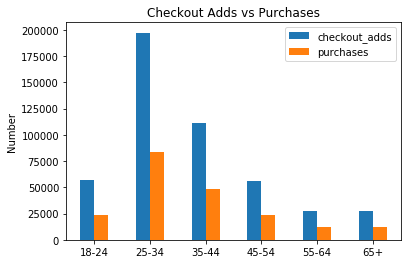

In [24]:
age_grouping[metrics].plot.bar()
ypos_age = range(len(ages))
plt.xticks(ypos_age,ages, rotation = 'horizontal')
plt.ylabel("Number")
plt.title("Checkout Adds vs Purchases")

Text(0.5,1,'Minutes Spent on Site vs Purchases')

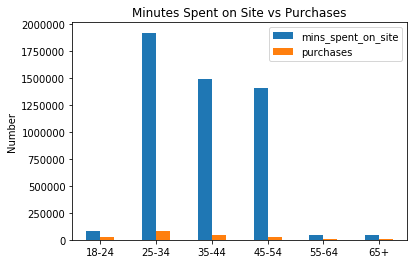

In [25]:
age_grouping[metrics2].plot.bar()
ypos_age = range(len(ages))
plt.xticks(ypos_age,ages, rotation = 'horizontal')
plt.ylabel("Number")
plt.title("Minutes Spent on Site vs Purchases")

Comparing checkout adds and purchases does not appear to reveal any particularly interesting relations. It makes sense that checkout adds would be higher than purchases and that having more checkout adds would correlate with more purchases. Looking at minutes spent on site vs purchases is very peculiar. It would seem like spending more time on the site would result in higher purchases, however there is a huge spike in time spent on the site in individuals aged 25-54 without a large increase in purchases. It could be that individuals in those ages are more particular and spend a lot of time browsing before deciding on an item to purchase.

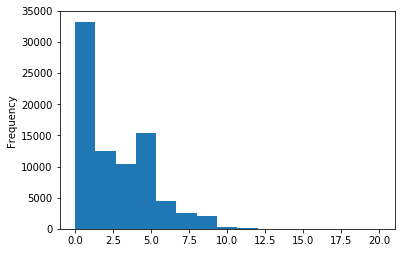

In [26]:
dataset_clean["purchases"].plot.hist(bins = 15 ,range = (0,20))

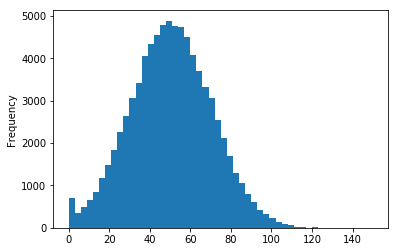

In [27]:
dataset_clean["site_visits"].plot.hist(bins = 50 ,range = (0,150))

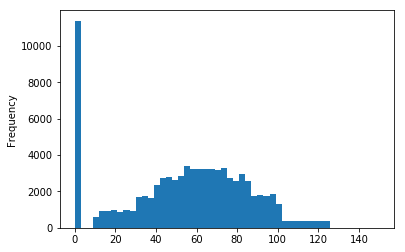

In [28]:
dataset_clean["cac"].plot.hist(bins =50 ,range = (0,150))

The plot for purchases is right skewed which makes sense that a lot of people who visit the site never make a purchase. The plot for site visits is fairly normally distributed so most customers spend somewhere between 40 and 60 minutes on the site. The graph for CAC is interesting because there is a large spike at 0 meaning there are a lot of customers that are gained organically and do not cost the company anything, this is great considering we are assuming there only cost is CAC.

In [29]:
month_grouping

,month,id,site_visits,product_page_visits,checkout_adds,purchases,aov,cac,nps,mins_spent_on_site,profit,site_to_product,product_to_adding,adding_to_purchasing,total_customers,repurchasing_customers,repurchasing_rate,demographic
0,1,348316219,348452,82615,41210,17593,258264,376256,43330.0,60631,295537,23.709148,49.881983,42.691094,5226,4162,79.640260,1
1,10,345825301,347235,82220,40276,17438,256790,370246,42904.0,1690981,291872,23.678489,48.985648,43.296256,5169,4081,78.951441,10
2,11,331469980,331286,78479,39192,16876,245201,359083,41628.0,58409,281089,23.689199,49.939474,43.059808,4953,3930,79.345851,11
3,12,346914235,347359,81382,40668,17485,256635,375536,43173.0,60667,290962,23.428787,49.971738,42.994492,5182,4075,78.637592,12
4,2,312496856,310466,74986,36721,15528,230514,337724,38335.0,1378193,250797,24.152725,48.970474,42.286430,4585,3655,79.716467,2
5,3,346801538,344660,81842,40553,17284,254474,372466,42675.0,60478,281854,23.745720,49.550353,42.620768,5110,4051,79.275930,3
6,4,339217501,341000,81211,39768,16901,252745,365526,42484.0,60126,274046,23.815543,48.968736,42.498994,5095,4008,78.665358,4
7,5,333866784,333009,80583,39706,17065,244733,359825,41056.0,58174,281923,24.198445,49.273420,42.978391,4959,3961,79.874975,5
8,6,327851589,331881,78495,38685,16446,244666,360855,40583.0,57816,264596,23.651550,49.283394,42.512602,4953,3902,78.780537,6
9,7,346982151,342589,81248,39797,17069,254370,372602,42257.0,59540,272367,23.715881,48.982129,42.890168,5099,4040,79.231222,7


### Conclusions 

In [30]:
print(age_grouping.loc[age_grouping["profit"].argmax(),"age"])
print(gender_grouping.loc[gender_grouping["profit"].argmax(),"gender"])
print(state_grouping.loc[state_grouping["profit"].argmax(),"state"])
print(device_grouping.loc[device_grouping["profit"].argmax(),"device"])
print(source_grouping.loc[source_grouping["profit"].argmax(),"utm_source"])
print(month_grouping.loc[month_grouping["profit"].argmax(),"month"])


25-34
female
California
mobile
organic
1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/p

#### Top Demographic

Looking at which demographic has the highest profit across the different groupings we find that the top age range is 25-34 year olds, the top gender is female, the most profitabble state is California, most of their profit comes from individuals using their mobile device, their organic leads are the most profitable, and they were most profitable in the month of January.  

In [31]:
#state_grouping.plot.scatter(x='site_visits',y='nps',c='DarkBlue')



In [32]:
metrics_for_nps = ['product_page_visits','checkout_adds','purchases','aov','cac','mins_spent_on_site']
for metric in metrics_for_nps:
    print(dataset_clean[[metric, 'nps']].corr())



                     product_page_visits      nps
product_page_visits              1.00000  0.04104
nps                              0.04104  1.00000
               checkout_adds       nps
checkout_adds       1.000000  0.113635
nps                 0.113635  1.000000
           purchases       nps
purchases   1.000000  0.313051
nps         0.313051  1.000000
          aov       nps
aov  1.000000  0.006536
nps  0.006536  1.000000
          cac       nps
cac  1.000000 -0.001296
nps -0.001296  1.000000
                    mins_spent_on_site       nps
mins_spent_on_site            1.000000 -0.002314
nps                          -0.002314  1.000000


Looking at the correlation between different metrics and net promoter score none of the metrics seems to have a particularly signifgant effect on predicting nps. The most signifigant one is a moderate correltation between purchases and nps with an r value of 0.313

### Areas for improvement

In [33]:
print(source_grouping.loc[source_grouping["profit"].argmax(),"utm_source"])
print(source_grouping.loc[source_grouping["profit"].argmin(),"utm_source"])

organic
affiliate


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  


The most profitable source of users comes from their organic growth whereas the least profitable comes from affiliate marketing. The company should probably reconsider their affiliate marketing efforts because the use of affiliates that get a cut of the purchases is costing the company money and not translating to enough increases in purchases or purchase value to offset the costs.

In [34]:
print(conversions_df["site_to_product"].mean())
print(conversions_df['product_to_adding'].mean())
print(conversions_df['adding_to_purchasing'].mean())
print(conversions_df['repurchasing_rate'].mean())

23.7129531830734
49.380372078296915
40.31867355387841
77.33547130732794


Looking at the average of the different conversions across all demographics reveals a weak spot when it comes to converting people form visiting the site to actually looking at product pages with less than 24% of users doing so. It would appear that the site does not make customers interested in going further and looking at the products they offer. The company may want to look into redesigning the website to help remedy this issue. They could change the layout and presentation of products on their home page to make users more inclined to click on something or test to see how easy it is for users to navigate to product pages to see if thats what is lowering the conversion rates.

In [35]:
conversions_df["site_to_product"]

0     23.711008
1     23.766698
2     23.806181
3     23.724182
4     23.577911
5     23.988803
0     23.765842
1     23.767494
0     24.609136
1     22.859410
2     23.380058
3     22.800986
4     24.134945
5     23.396632
6     23.884595
7     23.763005
8     23.586467
9     23.875449
10    23.768600
11    22.305941
12    23.436187
13    24.163498
14    23.707356
15    23.676593
16    23.491915
17    23.816162
18    22.116689
19    22.768960
20    24.023851
21    24.266675
        ...    
40    22.894733
41    23.321405
42    23.050837
43    25.551102
44    23.316779
45    23.535894
46    24.093817
47    23.445386
48    25.018396
0     23.714227
1     23.044714
2     24.467717
3     23.842200
0     23.570217
1     23.690139
2     23.743054
3     23.780956
4     24.037045
0     23.709148
1     23.678489
2     23.689199
3     23.428787
4     24.152725
5     23.745720
6     23.815543
7     24.198445
8     23.651550
9     23.715881
10    23.574381
11    23.890593
Name: site_to_product, L